In [1]:
from neuralplayground.arenas import Sphere
from neuralplayground.agents import Stachenfeld2018
import numpy as np

In [ ]:
class RatInASphere(Stachenfeld2018):
    def __init__(self, agent_name: str = "SR", discount: float = 0.9, threshold: float = 0.000001, lr_td: float = 0.01, room_width: float = 12, room_depth: float = 12, state_density: float = 1, twoD: bool = True, **mod_kwargs):
        super().__init__(agent_name, discount, threshold, lr_td, room_width, room_depth, state_density, twoD, **mod_kwargs)

In [2]:
import numpy as np
sphere = Sphere(n_stacks=360, n_slices=360)
for i in range(30000):
    act = np.random.uniform(-1,1,3)
    sphere.step(act)

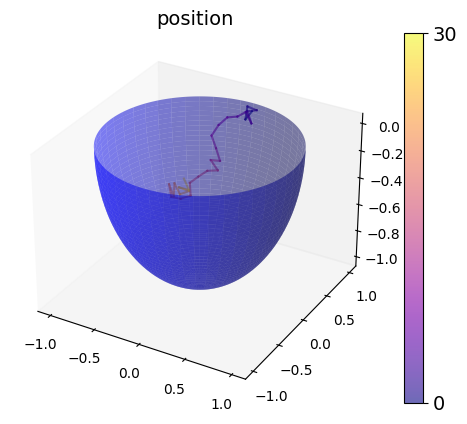

In [3]:
sphere.render()